# Z-toets FIFA 19

<b>*Een voetbalcommentator beweert dat de potentie van de huidige generatie Engelse spelers sterk verschilt van spelers uit de rest van de wereld.*</b>

Onderzoek met de dataset of de commentator gelijk heeft. Neem een steekproef van 100 Engelse spelers en beschouw de hele dataset als populatie. Kies als betrouwbaarheid 95%.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp

 Onze gekozen CSV-file dataset inladen: <br>
- fifa19.csv

De dataset bevat: <br>
1. Alle spelers uit FIFA 19.
2. Speelpositie en fysieke eigenschappen.
3. Persoonlijke spelersinformatie (bijv. nationaliteit, club, leeftijd, salaris etc.).

#### 1. Stel hypothesen op

H0: Er is geen verschil ($\mu_{potentieEng} = \mu_{populatie}$)

H1: Er is een verschil ($\mu_{potentieEng} \ne \mu_{populatie}$)

Er is sprake van een _tweezijdige_ toets.

In [2]:
fifa_source = pd.read_csv('source/fifa19.csv', index_col=0)

#### 2. Bereken de steekproefstatistieken

Alleen de <b>engelse</b> spelers uit de dataset filteren:

In [3]:
all_english_players = fifa_source.loc[fifa_source['Nationality'] == 'England']
all_english_players.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
60,202652,R. Sterling,23,https://cdn.sofifa.org/players/4/19/202652.png,England,https://cdn.sofifa.org/flags/14.png,86,89,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,77.0,47.0,58.0,54.0,15.0,12.0,12.0,15.0,9.0,€108.8M
117,211117,D. Alli,22,https://cdn.sofifa.org/players/4/19/211117.png,England,https://cdn.sofifa.org/flags/14.png,84,90,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,86.0,70.0,70.0,63.0,7.0,6.0,9.0,11.0,8.0,€87.1M
135,188377,K. Walker,28,https://cdn.sofifa.org/players/4/19/188377.png,England,https://cdn.sofifa.org/flags/14.png,84,84,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,75.0,78.0,84.0,83.0,12.0,6.0,16.0,15.0,8.0,€45.3M
180,204935,J. Pickford,24,https://cdn.sofifa.org/players/4/19/204935.png,England,https://cdn.sofifa.org/flags/14.png,83,88,Everton,https://cdn.sofifa.org/teams/2/light/7.png,...,69.0,16.0,20.0,12.0,83.0,78.0,88.0,81.0,86.0,€49.4M
182,203574,J. Stones,24,https://cdn.sofifa.org/players/4/19/203574.png,England,https://cdn.sofifa.org/flags/14.png,83,87,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,80.0,85.0,85.0,82.0,7.0,15.0,11.0,10.0,8.0,€54.9M
251,208830,J. Vardy,31,https://cdn.sofifa.org/players/4/19/208830.png,England,https://cdn.sofifa.org/flags/14.png,82,82,Leicester City,https://cdn.sofifa.org/teams/2/light/95.png,...,82.0,56.0,52.0,51.0,15.0,14.0,7.0,15.0,11.0,€38M
254,207494,J. Lingard,25,https://cdn.sofifa.org/players/4/19/207494.png,England,https://cdn.sofifa.org/flags/14.png,82,83,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,84.0,65.0,50.0,44.0,14.0,10.0,8.0,13.0,9.0,€51M
259,203263,H. Maguire,25,https://cdn.sofifa.org/players/4/19/203263.png,England,https://cdn.sofifa.org/flags/14.png,82,85,Leicester City,https://cdn.sofifa.org/teams/2/light/95.png,...,79.0,81.0,84.0,81.0,14.0,16.0,9.0,14.0,9.0,€46.4M
290,186345,K. Trippier,27,https://cdn.sofifa.org/players/4/19/186345.png,England,https://cdn.sofifa.org/flags/14.png,82,82,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,73.0,77.0,82.0,79.0,11.0,14.0,8.0,11.0,10.0,€34.2M


Onze gefilterde dataset:
- Bevat 1662 rijen (dus <b>1662 engelse spelers</b>)

In [4]:
all_english_players.shape[0]

1662

Voor onze steekproef zijn <b>100 Engelse spelers</b> nodig:
- wordt gebruik gemaakt van .sample(), zodat er altijd random 100 spelers worden gekozen.

In [5]:
hundred_random_players = all_english_players.sample(100)

Berekenen van column <b>Potential</b>:
- steekproefgemiddelde <b>(x_)</b>
- steekproefstandaardafwijking <b>(s)</b>
- populatiegemiddelde <b>(s)</b>
- standaardfout <b>(se)</b>

In [14]:
n = hundred_random_players.shape[0]
print("Steekproefgrootte n = {}".format(n))
x_ = np.mean(hundred_random_players['Potential'])
print("Steekproefgemiddelde x_ = {:.2f}".format(x_))
s = hundred_random_players['Potential'].std()
print("Steekproefstandaardafwijking s = {:.2f}\n".format(s))

mu = np.mean(fifa_source['Potential'])
print("Populatiegemiddelde = {:.2f}".format(mu))

sigma = fifa_source['Potential'].std()
print("Populatiestandaardafwijking sigma = {:.2f}".format(sigma))

# n = fifa_source['ID'].size
# print("Populatiegrootte n = {}".format(n))
# sigma = np.std(fifa_source['Potential'])
# print("Standaardafwijking populatie = {:.2f}".format(sigma))
# mu = np.mean(fifa_source['Potential'])
# print("Gemiddelde populatie = {:.2f}".format(mu))



Steekproefgrootte n = 100
Steekproefgemiddelde x_ = 70.22
Steekproefstandaardafwijking s = 6.49

Populatiegemiddelde = 71.31
Populatiestandaardafwijking sigma = 6.14


In [15]:
se = sigma/np.sqrt(n)
print("Standaardfout se = {:.2f}".format(se))

Standaardfout se = 0.61


#### 3. Bepaal de foutmarge

Betrouwbaarheid moet 95% zijn;
- 𝛼 = 0.05

In [16]:
alpha = 0.05

z_grens = stats.norm.ppf(1-(alpha/2))
print("De grens z_waarde is {:.2f}".format(z_grens))


l_grens = mu - z_grens * se
r_grens = mu + z_grens * se
print("Het betrouwbaarheidsinterval is {:.2f} < IQ < {:.2f} ".format(l_grens, r_grens))


De grens z_waarde is 1.96
Het betrouwbaarheidsinterval is 70.10 < IQ < 72.51 


#### 4. Bereken z-waarde en p-waarde (maak een schets)

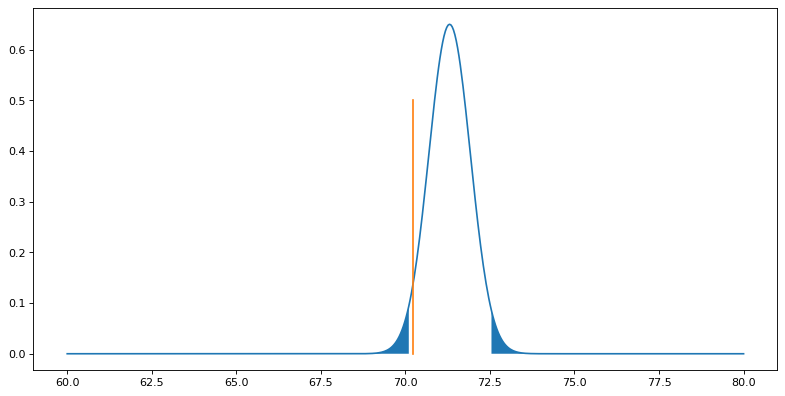

In [17]:
# Schets de verdeling 
x = np.linspace(60,80,500)
nv = stats.norm(loc=mu, scale=se)   
y = nv.pdf(x)

plt.figure(figsize=(12,6), dpi=80)
plt.plot(x,y)
# plt.fill_between(x, y, facecolor='blue', where=(x>r_grens))
# plt.fill_between(x, y, facecolor='green', where=(x<l_grens))
plt.fill_between(x, y, where=sp.logical_or(x<l_grens, x>r_grens))

# plaats van het steekproefgemiddelde
plt.plot([x_,x_],[0,0.5])

In [18]:
# Bereken z-waarde
z = (x_ - mu)/se
print("De z-waarde (rechts) z = {:.2f}".format(z))

# Bereken p-waarde
p = stats.norm.cdf(-z)*2
print("De p-waarde p = {:.2f}, (werkelijk {})".format(p,p))

De z-waarde (rechts) z = -1.77
De p-waarde p = 1.92, (werkelijk 1.9235817359228173)


<b>5. Conclusie</b>

In [20]:
print("Er geldt dat p = {:.2f} > {}".format(p,alpha))

Er geldt dat p = 1.92 > 0.05


Er geldt dat $p = 1.92 > \alpha = 0.05$.
Dat p = 1.70 betekent dat deze uitkomst door toeval plaats heeft kunnen vinden, 
dus we verwerpen $H_1$ en aanvaarden $H_0$: er is dus een geen significant verschil tussen de potentie van de Engelse speler t.o.v. de rest van de wereld.